### Import Libraries 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### import data

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Exploratory data analysis

#### Boxplot

<AxesSubplot:>

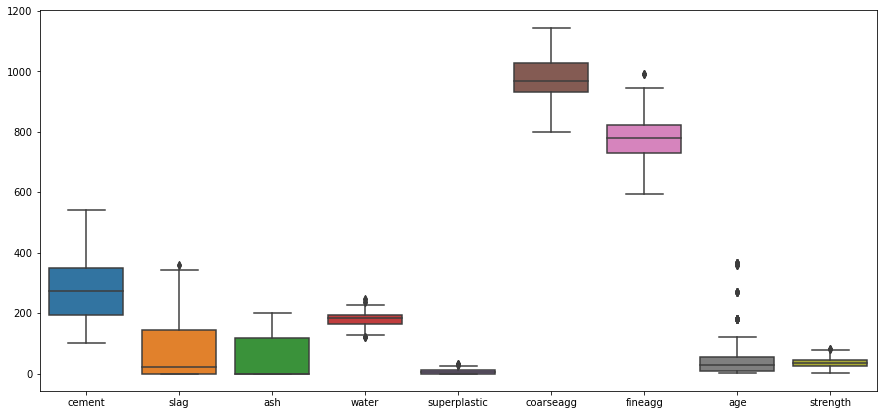

In [7]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)

#### Distribution of data

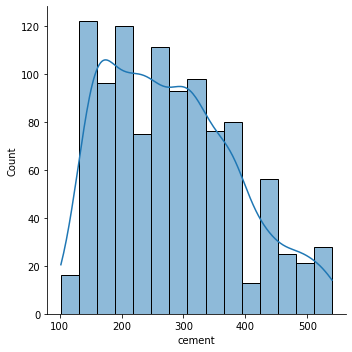

In [8]:
sns.displot(df.cement,kde=True)

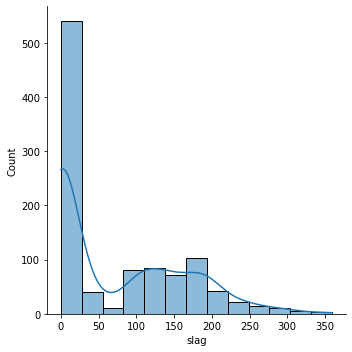

In [9]:
sns.displot(df.slag,kde=True)

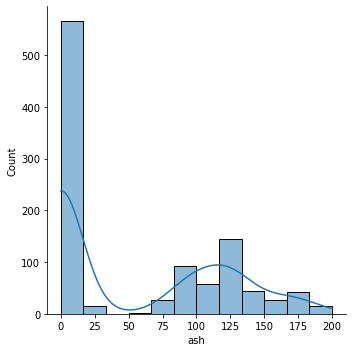

In [10]:
sns.displot(df.ash,kde=True)

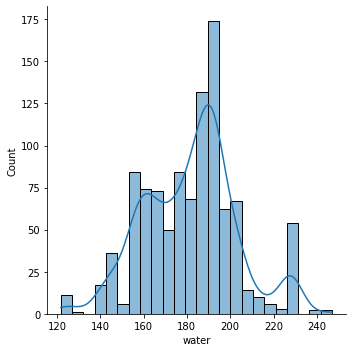

In [11]:
sns.displot(df.water,kde=True)

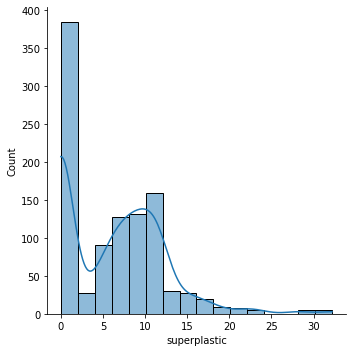

In [12]:
sns.displot(df.superplastic,kde=True)

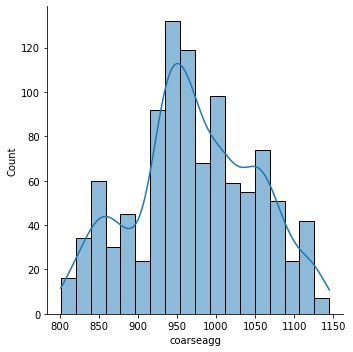

In [13]:
sns.displot(df.coarseagg,kde=True)

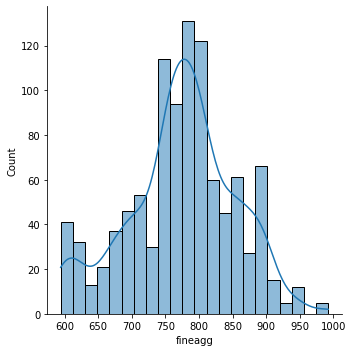

In [14]:
sns.displot(df.fineagg,kde=True)

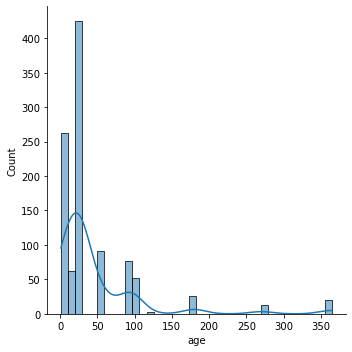

In [15]:
sns.displot(df.age,kde=True)

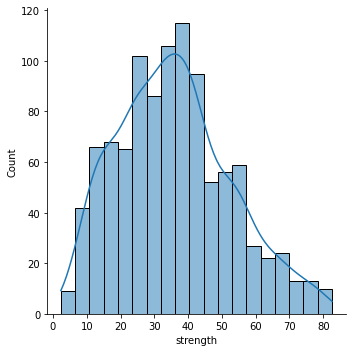

In [16]:
sns.displot(df.strength,kde=True)

#### Pairplot

<Figure size 1440x1440 with 0 Axes>

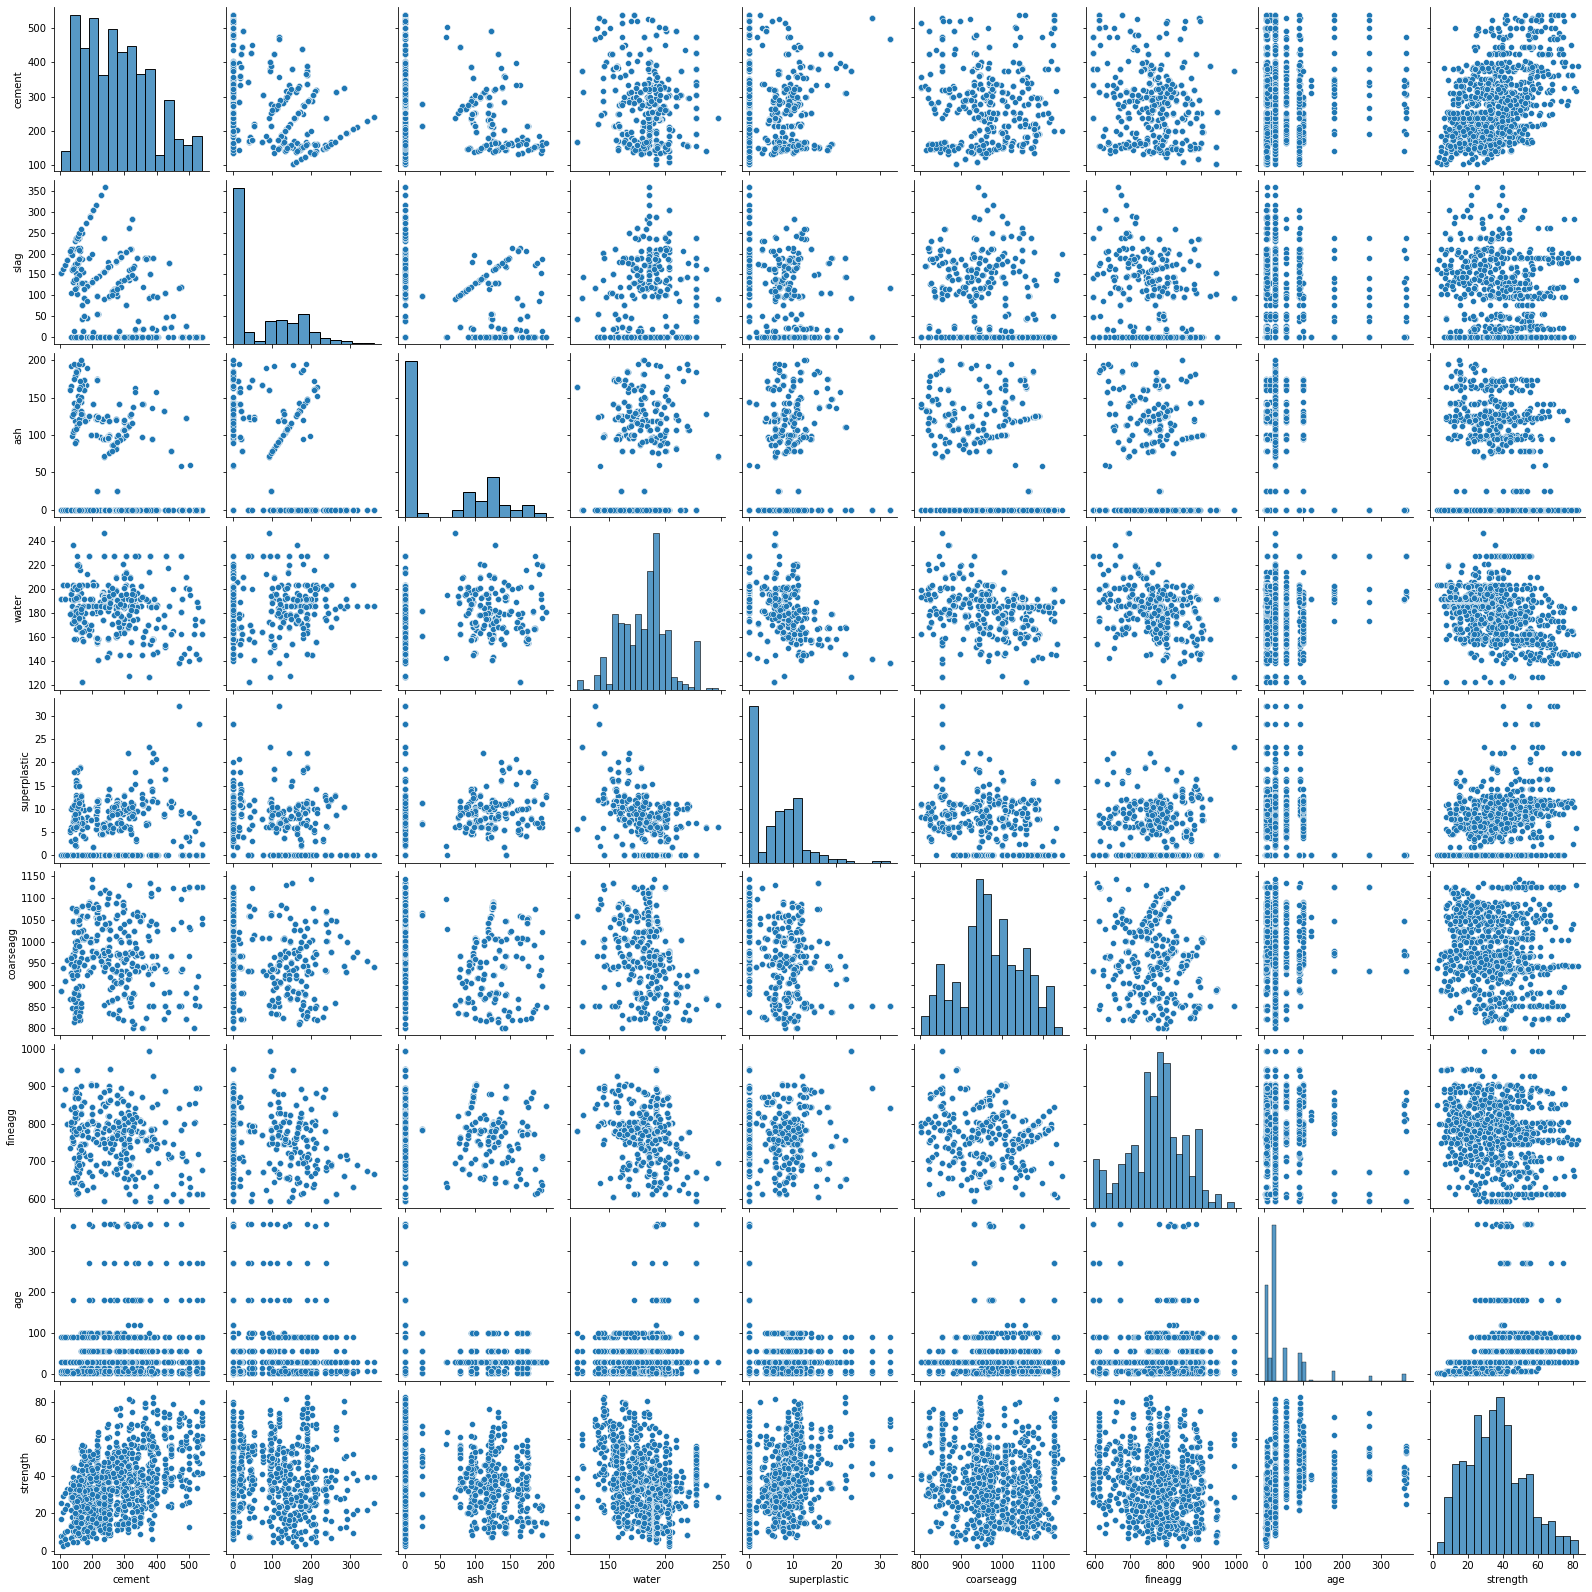

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

#### Heatmap

<AxesSubplot:>

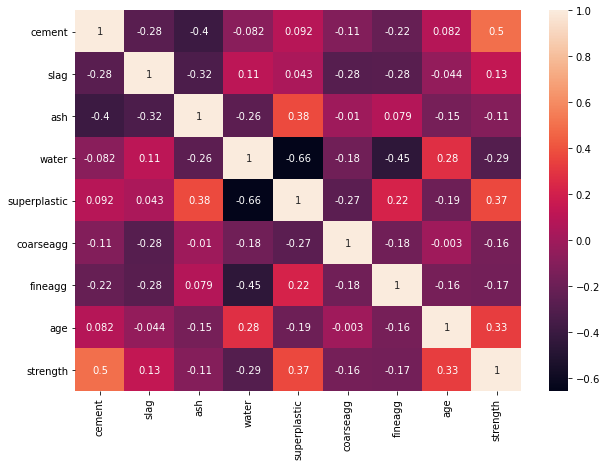

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

### Data preprocessing


#### scaling the data

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
# doing log transformation
#since most of the value are 0 so adding 1 to dataset

In [21]:
for columns in X.columns:
    X[columns]= X[columns]+1
    X[columns] = np.log(X[columns])

<AxesSubplot:>

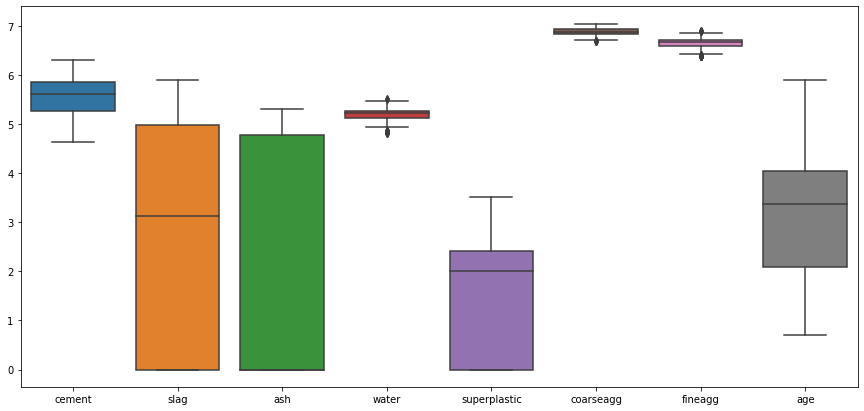

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(data=X)

In [25]:
X['strength'] = y

In [26]:
df = X

## Removing Outlier

In [28]:
 #Ouliers treatment

# Count outliers
q1= df.quantile(0.25)
q3= df.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((df > (q3+1.5*IQR)) | (df < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(df), 2)
outliers


,No. of outliers,Percentage of outliers
cement,0,0.00
slag,0,0.00
ash,0,0.00
water,14,1.36
superplastic,0,0.00
coarseagg,6,0.58
fineagg,40,3.88
age,0,0.00
strength,4,0.39


<AxesSubplot:>

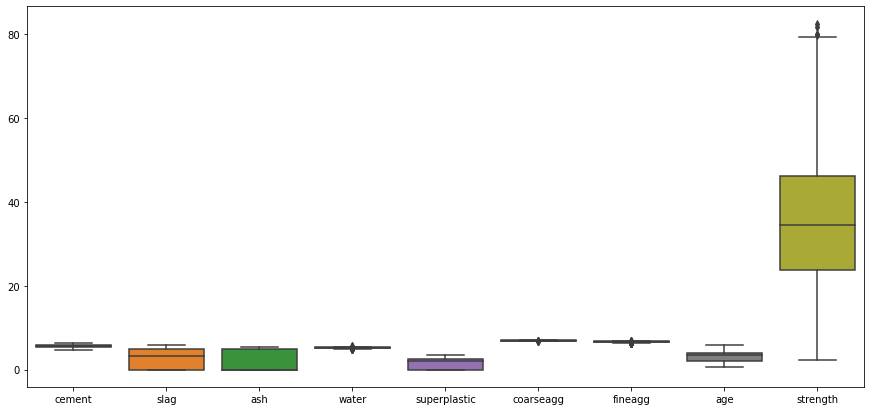

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)

In [35]:
#Standerdizing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['cement']] = sc.fit_transform(df[['cement']])
df[['slag']] = sc.fit_transform(df[['slag']])
df[['water']] = sc.fit_transform(df[['water']])
df[['superplastic']] = sc.fit_transform(df[['superplastic']])
df[['age']] = sc.fit_transform(df[['age']])

In [36]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.901276,-1.059324,0.000000,-0.897885,-0.175095,6.947937,6.517671,0.112702,79.99
1,1.901276,-1.059324,0.000000,-0.897885,-0.175095,6.962243,6.517671,0.112702,61.89
2,0.625512,1.000837,0.000000,1.970362,-1.260206,6.838405,6.388561,2.126253,40.27
3,0.625512,1.000837,0.000000,1.970362,-1.260206,6.838405,6.388561,2.397013,41.05
4,-0.728181,0.970562,0.000000,0.527414,-1.260206,6.886940,6.717200,2.384619,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.139806,0.916146,4.514151,-0.032831,0.725528,6.769757,6.645481,0.112702,44.28
1026,0.542782,-1.059324,4.758749,0.700481,0.847727,6.707962,6.702452,0.112702,31.18
1027,-1.490351,0.991777,4.696837,0.557958,0.437577,6.795034,6.660575,0.112702,23.70
1028,-1.309704,1.112222,0.000000,-0.221791,0.913544,6.898311,6.671906,0.112702,32.77


In [37]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
#sns.pairplot(data=df,x_vars=X,y_vars=y)

In [39]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
#model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [41]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
#Linear Regressor
lin = LinearRegression()
lin.fit(X_train,y_train)
y_lin = lin.predict(X_test)
print("r2 score ",r2_score(y_test,y_lin))
print("mae ",mean_absolute_error(y_test,y_lin))
print("mse ",mean_squared_error(y_test,y_lin))

r2 score  0.7903717349131936
mae  6.033568973099102
mse  58.53147229648367


In [43]:
#Decision Tree Regressor
dic = DecisionTreeRegressor(random_state=42, max_depth=4)
dic.fit(X_train,y_train)
y_lin = dic.predict(X_test)
print("r2 score ",r2_score(y_test,y_lin))
print("mae ",mean_absolute_error(y_test,y_lin))
print("mse ",mean_squared_error(y_test,y_lin))

r2 score  0.6185400892345064
mae  7.756546376759188
mse  106.50954054284577


In [44]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=42, max_depth=4)
rf.fit(X_train,y_train)
y_lin = rf.predict(X_test)
print("r2 score ",r2_score(y_test,y_lin))
print("mae ",mean_absolute_error(y_test,y_lin))
print("mse ",mean_squared_error(y_test,y_lin))

r2 score  0.750699448498082
mae  6.511504655007263
mse  69.60859175021149


In [45]:
#GradientBoosting Regressor
gb = GradientBoostingRegressor(random_state=42, max_depth=4)
gb.fit(X_train,y_train)
y_lin = gb.predict(X_test)
print("r2 score ",r2_score(y_test,y_lin))
print("mae ",mean_absolute_error(y_test,y_lin))
print("mse ",mean_squared_error(y_test,y_lin))

r2 score  0.9073163457122302
mae  3.636376550928261
mse  25.878717934506724


In [46]:
#Knn Regressor
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(X_train,y_train)
y_lin = kn.predict(X_test)
print("r2 score ",r2_score(y_test,y_lin))
print("mae ",mean_absolute_error(y_test,y_lin))
print("mse ",mean_squared_error(y_test,y_lin))

r2 score  0.8522872114746147
mae  4.620058823529412
mse  41.24370816993464


In [47]:
#SVR Regressor
sv = SVR(gamma='auto')
sv.fit(X_train,y_train)
y_lin = sv.predict(X_test)
print("r2 score ",r2_score(y_test,y_lin))
print("mae ",mean_absolute_error(y_test,y_lin))
print("mse ",mean_squared_error(y_test,y_lin))

r2 score  0.7701591509222843
mae  6.048184668680664
mse  64.17514014544646


In [48]:
#conclusion
#we has good r2 score in Gradient Boosting

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test,y_lin,squared=False)

8.010938780532932